In [1]:
# import section
%matplotlib inline
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import chart_studio.plotly as py
import random
import math

%reload_ext autoreload
%autoreload 2

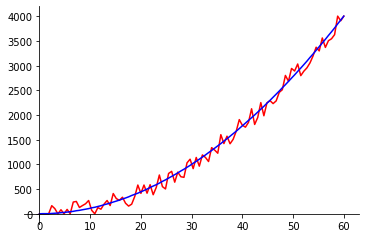

In [2]:
# 100 linearly spaced numbers from 0 to 60 (SLM)
Q = np.linspace(0, 60, 100)

# parameters
full_range = 4000.0 # Pa
max_flow = 60.0 # SLM
num_samples = 1024
error_factor = 5.0 / 100.0 # 5%

# proportionality constants
c = full_range / (max_flow ** 2)
k = (max_flow / (full_range ** 0.5))

# helper functions
measurement_error = lambda: random.uniform(-error_factor, error_factor) * full_range
f_add_error = np.vectorize(lambda x: x + measurement_error())
f_escalonado = np.vectorize(lambda x: min(full_range, max(0, math.ceil(x*num_samples/full_range)*full_range/num_samples)))

# pressure differential from Q (flow) and c (constant)
dp = c * Q ** 2
dp_with_error = f_add_error(dp)
dp_escalonado = f_escalonado(dp)
dp_with_error_escalonado = f_escalonado(dp_with_error)
# Flow measured (simulated) using constant k = max_flow / sqrt(full_range)
Q_medido = k * dp_with_error_escalonado ** 0.5

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(Q, dp_with_error_escalonado, 'r')
plt.plot(Q, dp_escalonado, 'b')

# show the plot
plt.show()

Ejemplo de integracion de volumen - regla trapecio


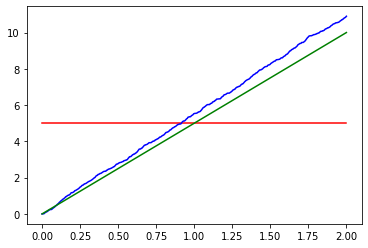

In [34]:
from scipy import integrate
sample_rate = 500 # Hz
max_seconds = 2 # upper time value in seconds

# time from 0 to max_seconds with sample_rate evenly spaced intervals
t = np.linspace(0, max_seconds, math.ceil(sample_rate * max_seconds))

# fill Q (flow) with 5 values sample_rate times
Q = np.full(math.ceil(sample_rate * max_seconds), 5)

# pressure differential from Q (flow) and c (constant)
dp = c * Q ** 2
dp_with_error = f_add_error(dp)
dp_escalonado = f_escalonado(dp)
dp_with_error_escalonado = f_escalonado(dp_with_error)
# Flow measured (simulated) using constant k = max_flow / sqrt(full_range)
Q_medido = k * dp_with_error_escalonado ** 0.5
V_integrado = integrate.cumtrapz(Q_medido, x=t, initial=0)
V_real = integrate.cumtrapz(Q, x=t, initial=0)

# plot the function
plt.plot(t, Q, 'r')
plt.plot(t, V_integrado, 'b')
plt.plot(t, V_real, 'g')

print('Ejemplo de integracion de volumen - regla trapecio')
# show the plot
plt.show()

In [41]:
sample_rate = 500 # Hz
max_seconds = 0.4 # upper time value in seconds

# time from 0 to max_seconds with sample_rate evenly spaced intervals
t = np.linspace(0, max_seconds, math.ceil(sample_rate * max_seconds))

# fill Q (flow) with 5 values sample_rate times
Q = np.full(math.ceil(sample_rate * max_seconds), 5)

# pressure differential from Q (flow) and c (constant)
dp = c * Q ** 2

def calc_volume(flow, t):
    dp_with_error = f_add_error(dp)
    dp_with_error_escalonado = f_escalonado(dp_with_error)
    # Flow measured (simulated) using constant k = max_flow / sqrt(full_range)
    Q_medido = k * dp_with_error_escalonado ** 0.5
    V_medido = np.trapz(Q_medido, x=t)
    V_real = np.trapz(Q, x=t)
    return abs(V_real - V_medido) / V_real

errores = []
iter_num = 1000
for i in range(iter_num):
    error = calc_volume(Q, t)
    errores.append(error)
promedio_errores = sum(errores) / len(errores)
desvest_errores = math.sqrt(sum([(e - promedio_errores) ** 2 for e in errores]) / len(errores))
print('Simulacion con %d iteraciones:' % iter_num)
print('Error promedio:', promedio_errores*100, '%')
print('Desviacion estandar:', desvest_errores*100, '%')

Simulacion con 1000 iteraciones:
Error promedio: 10.594241430662594 %
Desviacion estandar: 6.568344960819293 %
